OR 게이트 구현해보기 0,0 -> 0 1,0 -> 1 0,1 -> 1 1,1 -> 1

데이터 준비하기

In [1]:
import numpy as np

import tensorflow as tf
tf.random.set_seed(777)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

In [2]:
# 데이터 준비하기
data = np.array([[0,0],[1,0],[0,1],[1,1]]) # OR 학습 데이터
label = np.array([[0],[1],[1],[1]]) # 정답

모델 구성하기

In [3]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='linear')) # 단층 퍼셉트론을 구성

모델 설정하기

In [4]:
model.compile(optimizer= SGD(), loss=mse, metrics=['acc'])
# 컴파일 : 개발자가 작성한 코드를 컴퓨터가 알아들을 수 있는 언어로 변형하는 과정

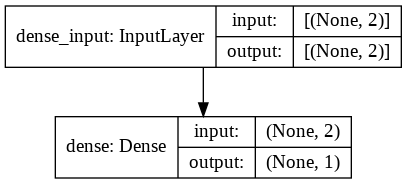

In [5]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)

모델 학습시키기

In [11]:
history = model.fit(data, label, epochs=100) # 학습데이터, 정답, 공부 횟수

Epoch 1/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1894 - acc: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1881 - acc: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1869 - acc: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1857 - acc: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1845 - acc: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1833 - acc: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1822 - acc: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 0.1810 - acc: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1799 - acc: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1787 - acc: 0.7500
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1776

학습 그려보기

Text(0.5, 0, 'epochs')

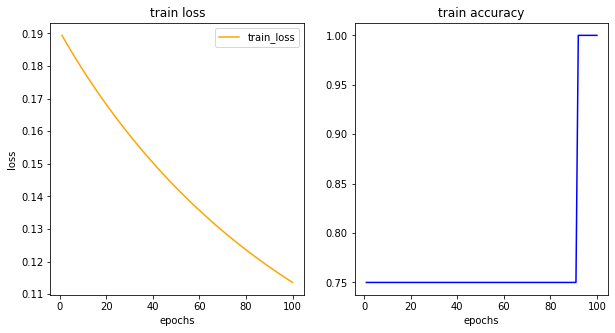

In [12]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')

모델 가중치 확인

In [8]:
model.get_weights()

[array([[ 0.69776404],
        [-0.18438019]], dtype=float32), array([0.49703857], dtype=float32)]

모델 예측하기

In [9]:
result = model.predict(data)
print(result)

[[0.49703857]
 [1.1948026 ]
 [0.31265837]
 [1.0104225 ]]


In [10]:
result = model.predict_classes(data)
print(result)

[[0]
 [1]
 [0]
 [1]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
